In [138]:
%pwd
%matplotlib inline 

/home/ubuntu/nbs


In [144]:
import os, sys 
%cd ~/nbs/
currentDir = os.getcwd() 
HOME_DIR = currentDir
DATA_DIR = currentDir + '/data/dogscats'
LESSON_SUBMISSION_DIR = DATA_DIR + '/submission/'
print HOME_DIR
print DATA_DIR
print LESSON_SUBMISSION_DIR


/home/ubuntu/nbs
/home/ubuntu/nbs
/home/ubuntu/nbs/data/dogscats
/home/ubuntu/nbs/data/dogscats/submission/


In [13]:
sys.path.append(os.path.join(os.getcwd(), "orig" ))

from utils import * 
from vgg16 import Vgg16 
%matplotlib inline



## Create validation and test samples

In [15]:
# Create directories
%cd $DATA_DIR
%mkdir valid
%mkdir results
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown
%cd $DATA_DIR/train
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(2000): os.rename(shuf[i], DATA_DIR+'/valid/' + shuf[i])
from shutil import copyfile

g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(200): copyfile(shuf[i], DATA_DIR+'/sample/train/' + shuf[i])

%cd $DATA_DIR/valid

g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(50): copyfile(shuf[i], DATA_DIR+'/sample/valid/' + shuf[i])

/home/ubuntu/nbs/data/dogscats
mkdir: cannot create directory ‘results’: File exists
/home/ubuntu/nbs/data/dogscats/train
/home/ubuntu/nbs/data/dogscats/valid


## Divide cats and dogs to different directories

In [18]:
# Divide cat/dog images into separate directories

%cd $DATA_DIR/sample/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_DIR/sample/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_DIR/valid
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $DATA_DIR/train
%mkdir cats
%mkdir dogs
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/


#Create single 'unknown' class for test set
%cd $DATA_DIR/test
%mv *.jpg unknown/

/home/ubuntu/nbs/data/dogscats/sample/train
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
mv: cannot stat 'cat.*.jpg': No such file or directory
mv: cannot stat 'dog.*.jpg': No such file or directory
/home/ubuntu/nbs/data/dogscats/sample/valid
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
mv: cannot stat 'cat.*.jpg': No such file or directory
mv: cannot stat 'dog.*.jpg': No such file or directory
/home/ubuntu/nbs/data/dogscats/valid
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
mv: cannot stat 'cat.*.jpg': No such file or directory
mv: cannot stat 'dog.*.jpg': No such file or directory
/home/ubuntu/nbs/data/dogscats/train
mkdir: cannot create directory ‘cats’: File exists
mkdir: cannot create directory ‘dogs’: File exists
mv: cannot stat 'cat.*.jpg': No such file or directory
mv: cannot stat 'dog.*.jpg': No such file or 

1. Create validation and test sets from original set (there are a bunch of moving images that you can use 
2. Download weights 
3. Finetune weights 
4. Generate predictions 
5. Validate predictions 
6. Submit everything to Kaggle 



In [19]:
%cd $DATA_DIR

#Set path to sample/ path if desired
path = DATA_DIR + '/sample/' #'/sample/'
test_path = DATA_DIR + '/test/' #We use all the test data
results_path=DATA_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

vgg = Vgg16() 
print path
print test_path
print results_path
print train_path 
print valid_path

/home/ubuntu/nbs/data/dogscats
/home/ubuntu/nbs/data/dogscats/sample/
/home/ubuntu/nbs/data/dogscats/test/
/home/ubuntu/nbs/data/dogscats/results/
/home/ubuntu/nbs/data/dogscats/sample//train/
/home/ubuntu/nbs/data/dogscats/sample//valid/


In [20]:
batch_size=64 
numEpochs=3


In [21]:
batches=vgg.get_batches(train_path, batch_size=batch_size)
valid_batches = vgg.get_batches(valid_path, batch_size=batch_size)
vgg.finetune(batches)
print vgg.classes

# set the learning rate 
# the optimizer is what runs gradient descent and 
vgg.model.optimizer.lr = 0.01

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
['cats', 'dogs']


In [22]:
lastEpochFileName = None 
for epoch in range(numEpochs): 
    print "Running epoch: %d" % epoch 
    vgg.fit(batches, valid_batches, nb_epoch=1)
    lastEpochFileName = 'ft%d.h5' % epoch 
    vgg.model.save_weights(results_path + lastEpochFileName)

print "Complete %s fit operations " % epoch 

    


Running epoch: 0
Epoch 1/1
200/200 [==============================] - 101s - loss: 1.8234 - acc: 0.6800 - val_loss: 0.4690 - val_acc: 0.9600
Running epoch: 1
Epoch 1/1
200/200 [==============================] - 105s - loss: 0.3857 - acc: 0.9650 - val_loss: 0.6447 - val_acc: 0.9600
Running epoch: 2
Epoch 1/1
200/200 [==============================] - 102s - loss: 0.2576 - acc: 0.9600 - val_loss: 0.3434 - val_acc: 0.9600
Complete 2 fit operations 


## Generate Predictions

After you have the validation and trainin set and training for 3 epochs, then you'll have to then now test it '

In [23]:
# do the prediction 
# use gen.flow_from_directory using shuffle=False, batch_size=8, class_mode=None
# 
batches, pred = vgg.test(test_path, batch_size=batch_size*2)



Found 12500 images belonging to 1 classes.


In [24]:
print batches.filenames[:5]
print batches.classes[:5]
print pred[:5]

['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']
[0 0 0 0 0]
[[  1.0000e+00   1.3315e-28]
 [  9.9424e-13   1.0000e+00]
 [  1.0000e+00   5.0638e-25]
 [  1.0000e+00   4.3066e-39]
 [  1.0776e-41   1.0000e+00]]


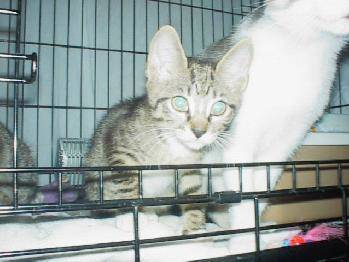

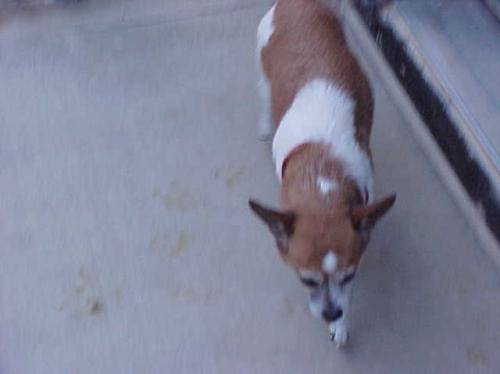

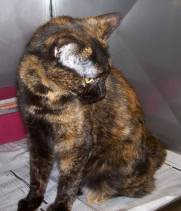

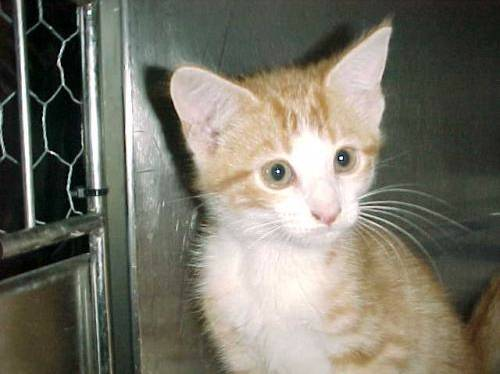

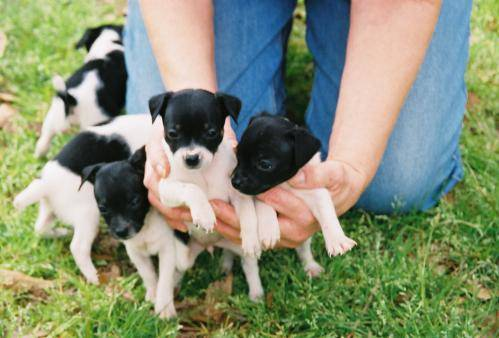

In [25]:
from IPython.display import Image
from IPython.display import display
a = Image(filename=test_path + batches.filenames[0]) 
b = Image(filename=test_path + batches.filenames[1])
c = Image(filename=test_path + batches.filenames[2]) 
d = Image(filename=test_path + batches.filenames[3]) 
e = Image(filename=test_path + batches.filenames[4]) 
display(a, b, c, d, e)




In [26]:
save_array(results_path + "test_pred", pred)
save_array(results_path + "filenames.dat", batches.filenames)

## Look at predictions in context of Validation set

1. Do the fit/predic cycle for vaidation set. Get 
2. Get predictions in log prob form 
3. Convert to rounded up to classes 
4. Compare against classes already in validation directory 



In [45]:
# load using training set models 
vgg.model.load_weights(results_path + lastEpochFileName) 
val_batches, val_predictions = vgg.test(valid_path, batch_size=batch_size)



Found 50 images belonging to 2 classes.


In [46]:
filenames = val_batches.filenames
expected_classes =  val_batches.classes # dogs and cats labels with 0 and 1. This is taken from the directory directly 

print val_predictions # these predictions are low decimals 

sliced_predictions = val_predictions[:,0] # sliced with only column 0 
rounded_predictions = np.round(1-sliced_predictions)


[[  1.0000e+00   5.7268e-27]
 [  1.0000e+00   1.1721e-31]
 [  3.4994e-01   6.5006e-01]
 [  1.0000e+00   2.6837e-24]
 [  1.0000e+00   1.1137e-22]
 [  1.0000e+00   8.9286e-27]
 [  1.0000e+00   9.7369e-17]
 [  1.0000e+00   3.7652e-37]
 [  1.0000e+00   4.8850e-31]
 [  1.0000e+00   1.7576e-20]
 [  9.5013e-09   1.0000e+00]
 [  1.0000e+00   6.3571e-27]
 [  1.0000e+00   6.0141e-40]
 [  1.0000e+00   1.6257e-27]
 [  1.0000e+00   9.4793e-39]
 [  1.0000e+00   9.3193e-21]
 [  1.0000e+00   1.8047e-25]
 [  1.0000e+00   3.2841e-34]
 [  1.0000e+00   1.1566e-18]
 [  1.0000e+00   4.7784e-43]
 [  1.0000e+00   1.5456e-42]
 [  1.0000e+00   7.7847e-30]
 [  4.5290e-34   1.0000e+00]
 [  4.1492e-42   1.0000e+00]
 [  1.8509e-27   1.0000e+00]
 [  2.1064e-24   1.0000e+00]
 [  2.0227e-25   1.0000e+00]
 [  4.1892e-41   1.0000e+00]
 [  4.7721e-26   1.0000e+00]
 [  1.0033e-42   1.0000e+00]
 [  2.1878e-35   1.0000e+00]
 [  1.5576e-18   1.0000e+00]
 [  3.7898e-16   1.0000e+00]
 [  7.2480e-24   1.0000e+00]
 [  1.8282e-33

In [47]:
from keras.preprocessing import image 

def plots_idx(idx, titles=None): 
    plots([image.load_img(valid_path+ filenames[i]) for i in idx], titles=titles)
    
num_imgs_to_view = 4 

    

Found 48 correct labels: 


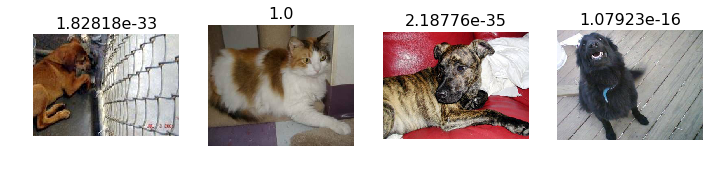

In [58]:
# view images at random 
correct = np.where(rounded_predictions==expected_classes)[0] # return array correct [ 0  1  2  3  4 5] ex. [0] necessary 
print "Found %d correct labels: " % len(correct)
idx = permutation(correct)[:num_imgs_to_view]
plots_idx(idx, sliced_predictions[idx])


Found 2 incorrect labels: 


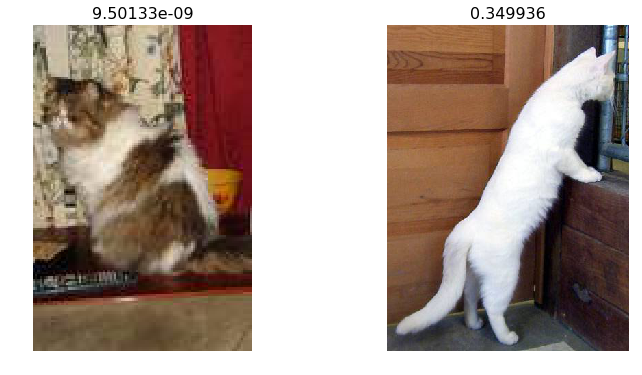

In [59]:
#2. A few incorrect labels at random
incorrect = np.where(rounded_predictions!=expected_classes)[0]
print "Found %d incorrect labels: " % len(incorrect)
idx = permutation(incorrect)[:num_imgs_to_view]
plots_idx(idx, sliced_predictions[idx])

Found 28 correct cats: 


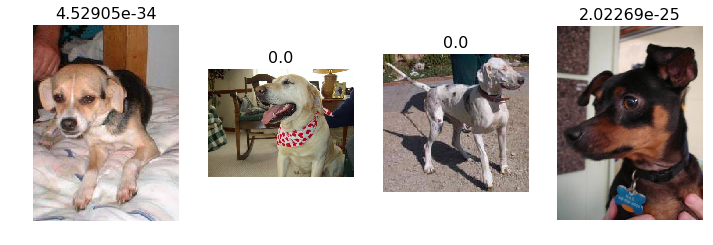

In [60]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((rounded_predictions == 1) & (rounded_predictions == expected_classes))[0]
print "Found %d correct cats: " % len(correct_cats)
idx = permutation(correct_cats)[:num_imgs_to_view]
plots_idx(idx, sliced_predictions[idx])

Found 20 incorrect dogs: 


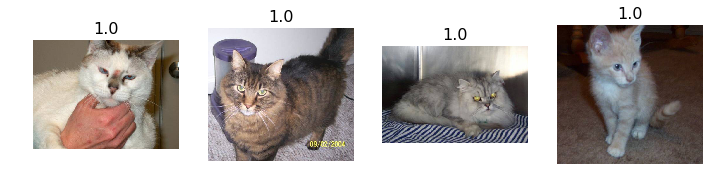

In [64]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((rounded_predictions == 0) & (rounded_predictions == expected_classes))[0]
print "Found %d incorrect dogs: " % len(correct_dogs)
idx = permutation(correct_dogs)[:num_imgs_to_view]
plots_idx(idx, sliced_predictions[idx])



Found 2 incorrect cats  


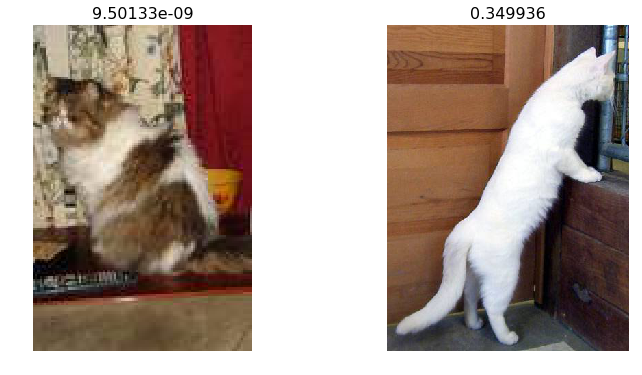

In [65]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((rounded_predictions == 1) & (rounded_predictions != expected_classes))[0]
print "Found %d incorrect cats  " % len(incorrect_cats)
idx = permutation(incorrect_cats)[:num_imgs_to_view]
plots_idx(idx, sliced_predictions[idx])

Found 2 incorrect dogs 


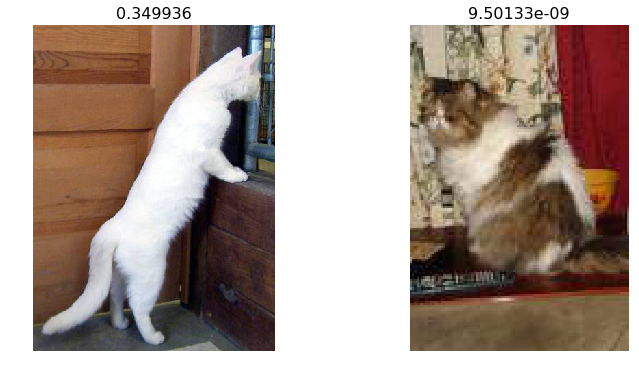

In [66]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((rounded_predictions == 1) & (rounded_predictions != expected_classes))[0]
print "Found %d incorrect dogs " % len(incorrect_dogs)
idx = permutation(incorrect_dogs)[:num_imgs_to_view]
plots_idx(idx, sliced_predictions[idx])

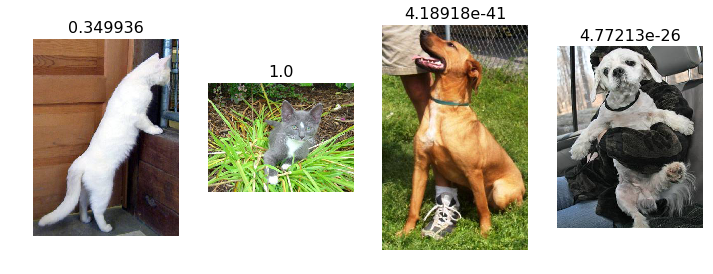

In [71]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
uncertain_labels = np.argsort(np.abs(sliced_predictions-0.5))
plots_idx(uncertain_labels[:num_imgs_to_view], sliced_predictions[uncertain_labels])


## Evaluate predictions with Confusion Matrix

[[20  2]
 [ 0 28]]


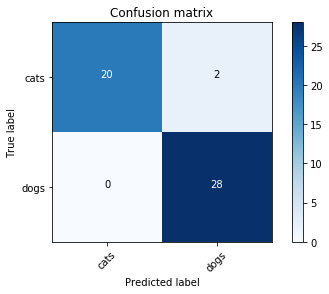

In [73]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(expected_classes, rounded_predictions)

plot_confusion_matrix(cm, val_batches.class_indices)

# Submit items to Kaggle

1. Load back the files into arrays (prediction and the filenames) 
2. Calculate the log loss of the probabilities of the predicted the labels
3. 

In [80]:
test_predictions = load_array(results_path + 'test_pred')
filenames = load_array(results_path + 'filenames.dat')

In [82]:
isdog = test_predictions[:,1]
print "Raw predictions: " + str(isdog[:5])
print "Mid level predictions: " + str(isdog[(isdog < .6) & (isdog > .4)])
print "Edge predictions " + str(isdog[(isdog == 1 ) | (isdog == 0)])


Raw predictions: [  1.3315e-28   1.0000e+00   5.0638e-25   4.3066e-39   1.0000e+00]
Mid level predictions: [ 0.4883  0.5455  0.5117  0.5071  0.4946  0.5112  0.591   0.4456  0.5734  0.4651  0.5278  0.5889
  0.465   0.5386  0.4599]
Edge predictions [ 1.  1.  1. ...,  1.  1.  1.]


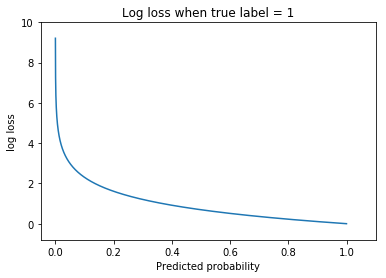

In [97]:
# Visualize log loss for a large number 
from sklearn.metrics import log_loss 
x = [i * 0.0001 for i in range(1,10000)]
y = [log_loss([0],[[i*.0001,1-(i*.0001)]],eps=1e-15, labels=[1,0]) for i in range(1,10000,1)]

plt.plot(x,y)
plt.axis([-0.05,1.1, -.8, 10])
plt.title("Log loss when true label = 1")
plt.xlabel("Predicted probability")
plt.ylabel("log loss")

plt.show()

In [107]:
isdog = isdog.clip(min=0.05, max=0.95)
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])
print(filenames[:5])
print(ids[:5])

['unknown/9292.jpg', 'unknown/12026.jpg', 'unknown/9688.jpg', 'unknown/4392.jpg', 'unknown/779.jpg']
[ 9292 12026  9688  4392   779]


In [108]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  9.2920e+03,   5.0000e-02],
       [  1.2026e+04,   9.5000e-01],
       [  9.6880e+03,   5.0000e-02],
       [  4.3920e+03,   5.0000e-02],
       [  7.7900e+02,   9.5000e-01]])

In [146]:
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')


from IPython.display import FileLink
%cd $LESSON_SUBMISSION_DIR
FileLink(submission_file_name)

/home/ubuntu/nbs/data/dogscats/submission


/home/ubuntu/nbs/data/dogscats/submission/submission1.csv